## Aula 14 - Transformada de Hough - Detecção de Linhas

Vamos aplicar a Transformada de Hough usando o OpenCV para **detecção de linhas**.

Vamos importar as bibliotecas necessárias:

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy

Agora, carregaremos a imagem de testes. Que tal usar uma imagem de exemplo do slide?

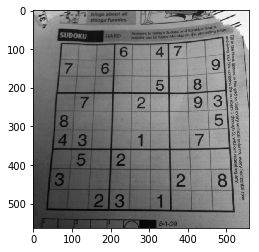

In [2]:
img = cv2.imread('sudoku.png', 0)
plt.imshow(img, cmap="gray")

O primeiro passo é detectar as bordas da imagem. Usaremos o [Canny Edge](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga2a671611e104c093843d7b7fc46d24af) para isso.

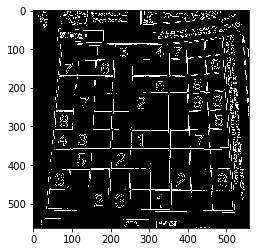

In [3]:
bordas = cv2.Canny(img, 50, 200)
plt.imshow(bordas, cmap="gray")

A transformada nos dará uma lista de linhas que iremos manipular para desenhar as linhas detectadas na imagem. Usaremos a função [cv2.HoughLines()](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga46b4e588934f6c8dfd509cc6e0e4545a) para aplicar a Transformada de Hough.

In [4]:
linhas = cv2.HoughLines(bordas, 1, np.pi / 180, 150, None, 0, 0)

In [5]:
print(linhas)

[[[ 3.6100000e+02  1.5707964e+00]]

 [[ 3.5700000e+02  1.5707964e+00]]

 [[ 3.0400000e+02  0.0000000e+00]]

 [[ 2.1200000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  3.4906585e-02]]

 [[ 2.1600000e+02  1.5707964e+00]]

 [[-3.4900000e+02  3.1241393e+00]]

 [[ 1.6900000e+02  1.5707964e+00]]

 [[ 2.1200000e+02  1.5707964e+00]]

 [[-3.9300000e+02  3.1066861e+00]]

 [[ 4.1200000e+02  1.5707964e+00]]

 [[-4.3600000e+02  3.0892327e+00]]

 [[ 2.6000000e+02  1.7453292e-02]]

 [[ 3.0200000e+02  0.0000000e+00]]

 [[-3.4500000e+02  3.1241393e+00]]

 [[-4.9700000e+02  3.0717795e+00]]

 [[-4.8400000e+02  3.0717795e+00]]

 [[ 7.9000000e+01  8.7266460e-02]]

 [[-3.9100000e+02  3.1066861e+00]]

 [[ 4.1000000e+02  1.5707964e+00]]

 [[-4.3900000e+02  3.0892327e+00]]

 [[-5.0300000e+02  3.0717795e+00]]

 [[-4.9100000e+02  3.0717795e+00]]

 [[-5.0900000e+02  3.0717795e+00]]

 [[ 8.3000000e+01  8.7266460e-02]]

 [[ 3.0900000e+02  1.5707964e+00]]

 [[ 4.6400000e+02  1.5707964e+00]]

 [[ 8.5000000e+01  1.0471976

In [6]:
import math
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

for i in range(0, len(linhas)):
    rho = linhas[i][0][0]
    theta = linhas[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(bordas_copia, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

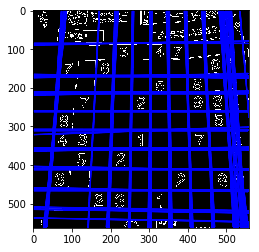

In [7]:
plt.imshow(bordas_copia)

O limiar é um parâmetro que pode ser tunado pra mudar o resultado dado pelo processo. Vamos experimentar mudar esse parâmetro e ver a mudança do resultado:

*Obs*: como isso é bastante custoso, cuidado com o slider!

In [8]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def limiar(l=100):
    
    linhas = cv2.HoughLines(bordas, 1, np.pi / 180, l, None, 0, 0)
    bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

    for i in range(0, len(linhas)):
        rho = linhas[i][0][0]
        theta = linhas[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(bordas_copia, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)

    ax.set_title("Limiar: %d" % (l), fontsize=48)
    ax.imshow(bordas_copia)

In [9]:
c = interactive(limiar, l=(20,200))
display(c)

interactive(children=(IntSlider(value=100, description='l', max=200, min=20), Output()), _dom_classes=('widget…

Uma outra opção é usar a Transformada de Hough probabilística. O processo é o mesmo, mas o método agora é o [cv2.HoughLinesP](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga8618180a5948286384e3b7ca02f6feeb):

In [10]:
linhas_P = cv2.HoughLinesP(bordas, 1, np.pi / 180, 50, None, 50, 10)

In [11]:
bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)
for linha in linhas_P:
    x1, y1, x2, y2 = linha[0]
    cv2.line(bordas_copia, (x1, y1), (x2, y2), (0, 0, 255), 3)

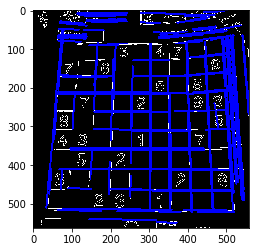

In [12]:
plt.imshow(bordas_copia)

Usando a transformada probabilística, temos mais liberdade para tunar parâmetros. Vamos mudar os parâmetros do limiar, o número mínimo de pontos para formar uma linha e a separação máxima dos pontos para serem considerados a mesma linha:

In [13]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def limiar(limiar=50, menorTamanhoLinha=50, maiorSeparacaoLinha=10):
    
    linhas_P = cv2.HoughLinesP(bordas, 1, np.pi / 180, limiar, minLineLength=menorTamanhoLinha, maxLineGap=maiorSeparacaoLinha)
    bordas_copia = cv2.cvtColor(bordas, cv2.COLOR_GRAY2BGR)

    for linha in linhas_P:
        x1, y1, x2, y2 = linha[0]
        cv2.line(bordas_copia, (x1, y1), (x2, y2), (0, 0, 255), 3)
    
    fig, ax = plt.subplots(1, 1, figsize=(32, 32))
    fig.subplots_adjust(hspace=0, wspace=0)

    ax.set_title("Limiar: %d - Menor tamanho: %d - Maior Separação: %d" % (limiar, menorTamanhoLinha, maiorSeparacaoLinha), fontsize=36)
    ax.imshow(bordas_copia)

In [14]:
c = interactive(limiar, limiar=(20,200), menorTamanhoLinha=(1, 400), maiorSeparacaoLinha=(10, 400))
display(c)

interactive(children=(IntSlider(value=50, description='limiar', max=200, min=20), IntSlider(value=50, descript…

Alguns outros exemplos estão disponíveis junto com o Notebook. Que tal carregar essas imagens e ver os resultados?

In [15]:
import os
for file in os.listdir():
    if file.endswith(".png") or file.endswith(".jpg"):
        print(file)

building.jpg
estrada.png
desktop5.png
sudoku.png
CTG - Principal.jpg
